1. Importing Libraries

In [1]:
import pandas as pd
import plotly.express as px

2. Importing Dataset

In [2]:
dataset=pd.read_csv("Zomato Chennai Listing 2020.csv")
dataset.head()

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


3. Getting basic information about dataset

In [3]:
dataset.shape

(12032, 12)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             12032 non-null  object 
 1   Name of Restaurant     12032 non-null  object 
 2   Address                12032 non-null  object 
 3   Location               12032 non-null  object 
 4   Cuisine                12032 non-null  object 
 5   Top Dishes             12032 non-null  object 
 6   Price for 2            12032 non-null  float64
 7   Dining Rating          6681 non-null   float64
 8   Dining Rating Count    11812 non-null  object 
 9   Delivery Rating        6181 non-null   float64
 10  Delivery Rating Count  11812 non-null  object 
 11  Features               12032 non-null  object 
dtypes: float64(3), object(9)
memory usage: 1.1+ MB


In [5]:
dataset.describe()

,Price for 2,Dining Rating,Delivery Rating
count,12032.000000,6681.000000,6181.000000
mean,397.611370,3.387756,3.805290
std,332.045938,0.558181,0.374213
min,40.000000,0.300000,0.300000
25%,200.000000,3.100000,3.600000
50%,300.000000,3.500000,3.900000
75%,450.000000,3.800000,4.000000
max,5000.000000,4.900000,4.700000


4. Cleaning the Dataset

a. Removing redundant header rows of data

In [6]:
# Checking redundant rows of data
wrong_data=dataset['Price for 2']=='Price for 2'
dataset[wrong_data]

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features


In [7]:
# Performing navegation of the wrong dataset and then storing the correct data back in the dataset
# this permanently remove the wrong data from the original dataframe

dataset=dataset[~ wrong_data]

In [8]:
# Dropping columns which are not required for further analysis

dataset.drop(['Zomato URL','Address','Features'],axis=1,inplace=True)
dataset.head()

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count
0,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306
1,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500
3,KFC,Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200
4,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400


b. Removing the Null Records

In [9]:
# Checking for null records
dataset.isnull().sum()

Name of Restaurant          0
Location                    0
Cuisine                     0
Top Dishes                  0
Price for 2                 0
Dining Rating            5351
Dining Rating Count       220
Delivery Rating          5851
Delivery Rating Count     220
dtype: int64

In [10]:
# Replacing the other null records with NA 

dataset.fillna('0', inplace=True)

C:\Users\Jayashree M\AppData\Local\Temp\ipykernel_18128\1624547464.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dataset.fillna('0', inplace=True)


In [11]:
# Conforming all the null records are correct

dataset.isnull().sum()

Name of Restaurant       0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating          0
Delivery Rating Count    0
dtype: int64

c. Converting the datatypes of numerical columns to numeric datatype

In [12]:
# Checking for text values in the column before converting it to numeric datatype 

dataset['Dining Rating'].value_counts()

Dining Rating
0      5351
3.6     584
3.5     553
3.7     525
3.4     500
3.3     463
3.8     460
3.2     433
3.9     379
3.1     363
2.0     354
3.0     302
4.0     288
2.9     257
4.1     221
2.8     192
4.2     142
2.7     138
4.3     105
2.6      99
2.5      71
4.4      61
2.4      46
4.5      36
2.3      32
2.2      20
4.6      17
4.7      12
2.1      10
4.9       7
4.8       4
1.9       3
1.7       2
0.3       1
1.0       1
Name: count, dtype: int64

In [13]:
 # Checking for text values in the column before converting it to numeric datatype 

dataset['Dining Rating Count'].value_counts()

Dining Rating Count
Does not offer Dining        2603
Not enough Dining Reviews    2528
4                             339
5                             271
6                             248
                             ... 
982                             1
1267                            1
1620                            1
2405                            1
587                             1
Name: count, Length: 793, dtype: int64

In [14]:
# Replacing the text values with 0 

dataset['Dining Rating Count'].replace(to_replace=['Does not offer Dining','Not enough Dining Reviews','NA'], value='0', inplace=True)

C:\Users\Jayashree M\AppData\Local\Temp\ipykernel_18128\2921314951.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Dining Rating Count'].replace(to_replace=['Does not offer Dining','Not enough Dining Reviews','NA'], value='0', inplace=True)


In [15]:
# Checking for text values in the column before converting it to numeric datatype 
dataset['Delivery Rating'].value_counts()

Delivery Rating
0      5851
3.9    1383
3.8     701
4.0     570
3.7     559
4.1     468
3.6     465
4.2     401
3.5     314
4.3     277
3.4     259
3.3     189
4.4     128
3.2      93
3.1      79
3.0      63
4.5      55
2.9      39
2.8      26
4.6      24
2.7      19
2.6      17
2.5       9
0.3       8
2.4       7
1.8       5
2.3       5
2.0       5
2.2       5
4.7       4
2.1       2
1.6       1
1.5       1
Name: count, dtype: int64

In [16]:
# Replacing the text values with 0 

dataset['Delivery Rating'].replace(to_replace=['NA'], value='0', inplace=True)

C:\Users\Jayashree M\AppData\Local\Temp\ipykernel_18128\3525635630.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Delivery Rating'].replace(to_replace=['NA'], value='0', inplace=True)


In [17]:
# Checking for text values in the column before converting it to numeric datatype 
dataset['Delivery Rating Count'].value_counts()

Delivery Rating Count
Not enough Delivery Reviews    3379
Does not offer Delivery        2252
0                               239
27                               34
60                               30
                               ... 
6226                              1
39600                             1
21700                             1
4320                              1
24700                             1
Name: count, Length: 2281, dtype: int64

In [18]:
# Replacing the text values with 0 
dataset['Delivery Rating Count'].replace(to_replace=['Does not offer Delivery','Not enough Delivery Reviews','NA'], value='0', inplace=True)

C:\Users\Jayashree M\AppData\Local\Temp\ipykernel_18128\3180778963.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Delivery Rating Count'].replace(to_replace=['Does not offer Delivery','Not enough Delivery Reviews','NA'], value='0', inplace=True)


In [19]:
 # Changing Data Type of the numerical columns
dataset['Dining Rating'] = dataset['Dining Rating'].astype('float64') 
dataset['Dining Rating Count'] = dataset['Dining Rating Count'].astype('int64') 
dataset['Delivery Rating'] = dataset['Delivery Rating'].astype('float64') 
dataset['Delivery Rating Count'] = dataset['Delivery Rating Count'].astype('int64') 


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name of Restaurant     12032 non-null  object 
 1   Location               12032 non-null  object 
 2   Cuisine                12032 non-null  object 
 3   Top Dishes             12032 non-null  object 
 4   Price for 2            12032 non-null  float64
 5   Dining Rating          12032 non-null  float64
 6   Dining Rating Count    12032 non-null  int64  
 7   Delivery Rating        12032 non-null  float64
 8   Delivery Rating Count  12032 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 846.1+ KB


In [21]:
dataset.isnull().sum()

Name of Restaurant       0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating          0
Delivery Rating Count    0
dtype: int64

d. Working with Rating

In [23]:
# Merging Rating
dataset['Rating']=(dataset['Dining Rating']+dataset['Delivery Rating'])/2
dataset['Rating Count']=(dataset['Dining Rating Count']+dataset['Delivery Rating Count'])/2
dataset['Rating Count']=dataset['Rating Count'].astype('int64')

In [24]:
# Dropping Rating
dataset.drop(['Dining Rating','Delivery Rating','Dining Rating Count','Delivery Rating Count'],axis=1,inplace=True)
dataset.head()

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Rating,Rating Count
0,Yaa Mohaideen Briyani,Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.30,5403
1,Sukkubhai Biriyani,Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.25,21129
2,SS Hyderabad Biryani,Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.35,5930
3,KFC,Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.00,6150
4,Tasty Kitchen,Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.15,11508


e. Working with Top Dishes column

In [25]:
# Replacing the invalid values with NA

dataset['Top Dishes'].replace(to_replace=['Invalid'], value='NA', inplace=True)

C:\Users\Jayashree M\AppData\Local\Temp\ipykernel_18128\324119776.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Top Dishes'].replace(to_replace=['Invalid'], value='NA', inplace=True)


f. Working with Cuisine column

In [26]:
import ast
dataset['Cuisine'] = dataset['Cuisine'].apply(ast.literal_eval)

In [27]:
def map_cuisine(cuisine_list):
    cuisine_list = [c.lower() for c in cuisine_list]

    categories = set()

    south = ['south indian', 'tamil', 'chettinad', 'kerala', 'andhra', 'hyderabadi','mangalorean']
    north = ['north indian', 'bihari','punjabi', 'malwani','maharashtrian','mughlai', 'kebab','rajasthani','gujarati','bengali','konkan']
    international = ['chinese', 'mediterranean','malaysian','arabian', 'sri lankan','tibetan','american','mexican','lebanese', 'italian', 'continental', 'asian', 'bbq','japanese', 'korean','thai','middle eastern','burmese','vietnamese', 'indonesian']
    desserts = ['dessert', 'desserts', 'british','paan','ice cream', 'icecream','cake', 'cakes', 'pastry', 'pastries','bakery', 'cafe','tea','sweet', 'sweets','coffee', 'tea', 'beverages', 'juice','juices' 'mithai']
    fastfood = ['burger', 'pizza', 'rolls', 'fast food', 'street food','finger food', 'sandwich', 'momos']
    healthyfood=['healthy food','salad','juices']
    for c in cuisine_list:
        if any(k in c for k in south):
            categories.add('South Indian')
        if any(k in c for k in north):
            categories.add('North Indian')
        if any(k in c for k in international):
            categories.add('International')
        if any(k in c for k in fastfood):
            categories.add('Fast Food')
        if any(k in c for k in healthyfood):
            categories.add('Healthy Food')
    # Special case
    if cuisine_list == ['biryani']:
        return 'Biryani'
    if cuisine_list == ['seafood']:
        return 'Seafood'
    if cuisine_list == ['bar food']:
        return 'Bar Food'
    if cuisine_list == ['raw meats']:
        return 'Raw Meats'
    if cuisine_list and all(any(k in c for k in desserts)for c in cuisine_list):
            return 'Desserts & Beverages'
    if len(categories) > 1:
        return 'Multi Cuisine'
    elif len(categories)== 1:
        return categories.pop()
    else:
        return 'Others'
dataset['Cuisine_Category'] = dataset['Cuisine'].apply(map_cuisine)

In [28]:
dataset['Cuisine_Category'].value_counts()

Cuisine_Category
Multi Cuisine           4820
Fast Food               2674
Desserts & Beverages    1536
South Indian            1285
International            969
North Indian             454
Biryani                  225
Healthy Food              28
Seafood                   15
Others                    10
Bar Food                   8
Raw Meats                  8
Name: count, dtype: int64

g. Removing Duplicate records

In [29]:
dataset['Cuisine'] = dataset['Cuisine'].astype('str') 
dataset['Top Dishes'] = dataset['Top Dishes'].astype('str') 
dataset['Cuisine']=dataset['Cuisine'].str.replace(r"[\[\]]"," ",regex=True)
dataset['Top Dishes']=dataset['Top Dishes'].str.replace(r"[\[\]]"," ",regex=True)
dataset.head()

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Rating,Rating Count,Cuisine_Category
0,Yaa Mohaideen Briyani,Pallavaram,'Biryani',"'Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.30,5403,Biryani
1,Sukkubhai Biriyani,Alandur,"'Biryani', ' North Indian', ' Mughlai', ' Des...","'Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.25,21129,North Indian
2,SS Hyderabad Biryani,Kodambakkam,"'Biryani', ' North Indian', ' Chinese', ' Ara...","'Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.35,5930,Multi Cuisine
3,KFC,Perambur,"'Burger', ' Fast Food', ' Finger Food', ' Bev...",'Zinger Burger',500.0,4.00,6150,Fast Food
4,Tasty Kitchen,Perambur,"'Chinese', ' Biryani', ' North Indian', ' Che...","'Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.15,11508,Multi Cuisine


In [30]:
 # Finding all the duplicate rows 
dataset[dataset.duplicated()]

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Rating,Rating Count,Cuisine_Category
9103,Brownie Heaven,T. Nagar,"'Bakery', ' Desserts', ' Beverages'",NA,350.0,0.0,0,Desserts & Beverages
9995,ibaco,Kanchipuram District,'Ice Cream',NA,200.0,0.0,0,Desserts & Beverages
10109,Cake Square,Thiruvanmiyur,"'Bakery', ' Desserts'",NA,400.0,0.0,0,Desserts & Beverages
10534,Cake Waves,Thiruvallur,"'Bakery', ' Fast Food'",NA,500.0,0.0,0,Fast Food
10665,OYALO,Anna Nagar West,"'Pizza', ' Italian', ' Desserts'",NA,450.0,0.0,0,Multi Cuisine
...,...,...,...,...,...,...,...,...
11927,Noodle Doodle,Chengalpattu,"'Chinese', ' Fast Food'",NA,300.0,0.0,0,Multi Cuisine
11988,Daal Rotti,Ambattur,'North Indian',NA,300.0,0.0,0,North Indian
11989,Daal Rotti,Chengalpattu,'North Indian',NA,300.0,0.0,0,North Indian
11995,Sardarji Kulfi,Anna Nagar East,'Ice Cream',NA,150.0,0.0,0,Desserts & Beverages


In [31]:
 # Dropping all the duplicate rows 
 
dataset = dataset.drop_duplicates()

5. Copying the cleaned data into a new DataFrame

In [32]:
zomato_df = dataset.copy()
zomato_df

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Rating,Rating Count,Cuisine_Category
0,Yaa Mohaideen Briyani,Pallavaram,'Biryani',"'Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.30,5403,Biryani
1,Sukkubhai Biriyani,Alandur,"'Biryani', ' North Indian', ' Mughlai', ' Des...","'Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.25,21129,North Indian
2,SS Hyderabad Biryani,Kodambakkam,"'Biryani', ' North Indian', ' Chinese', ' Ara...","'Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.35,5930,Multi Cuisine
3,KFC,Perambur,"'Burger', ' Fast Food', ' Finger Food', ' Bev...",'Zinger Burger',500.0,4.00,6150,Fast Food
4,Tasty Kitchen,Perambur,"'Chinese', ' Biryani', ' North Indian', ' Che...","'Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.15,11508,Multi Cuisine
...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,'Sandwich',NA,350.0,0.00,0,Fast Food
12028,CK's Sandwiches,Kolathur,'Sandwich',NA,350.0,0.00,0,Fast Food
12029,CK's Sandwiches,Anna Nagar East,'Sandwich',NA,350.0,0.00,0,Fast Food
12030,CK's Sandwiches,Ramapuram,'Sandwich',NA,350.0,0.00,0,Fast Food


5. Performing Exploratory Data Analysis


Q1) How many restaurants are in Chennai for each type of cuisine?

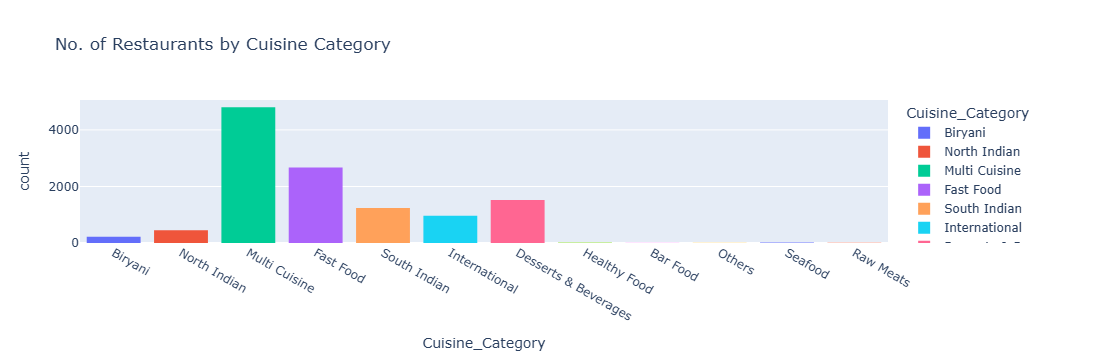

In [33]:
fig = px.histogram(zomato_df, x='Cuisine_Category', color='Cuisine_Category',  
             title= 'No. of Restaurants by Cuisine Category',  
             labels={'Cuisine Category':'Cuisine_Category'}) 
 
fig.show()

Q2) What are the percentage of restaurants by Rating Type in Chennai?

In [34]:
rating_type_df = zomato_df['Rating'].value_counts().reset_index() 
rating_type_df.rename(columns={'index':'Rating', 'count':'COUNT OF RESTAURANTS'}, inplace=True) 
rating_type_df

,Rating,COUNT OF RESTAURANTS
0,0.00,3468
1,1.95,521
2,1.80,342
3,1.90,297
4,1.85,289
...,...,...
94,1.90,1
95,2.45,1
96,2.65,1
97,2.40,1


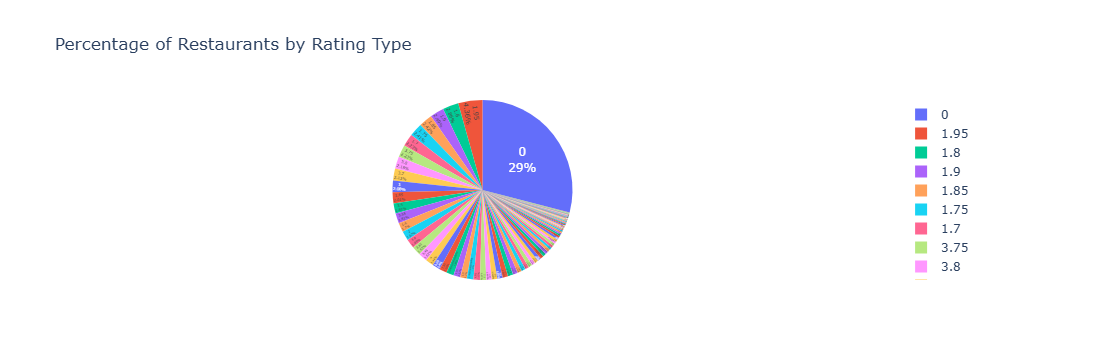

In [35]:
fig = px.pie(rating_type_df, names='Rating', values='COUNT OF RESTAURANTS', color='Rating',  
title='Percentage of Restaurants by Rating Type').update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Q3) Which are the Top 10 highest rated Seafood Restaurant in Chennai?

In [36]:
seafood_df = zomato_df[zomato_df['Cuisine_Category'].str.contains('Seafood')] 
seafood_df.sort_values(by='Rating',ascending=False).head(10)

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Rating,Rating Count,Cuisine_Category
1683,Titanic,Triplicane,'Seafood','Pepper Prawns',400.0,3.85,627,Seafood
1583,Bambino Beach Restaurant,Mahabalipuram,'Seafood','Sea Food',800.0,1.90,22,Seafood
2640,Kayal - Le Royal Meridien,"Le Royal Meridien, St. Thomas Mount",'Seafood',NA,2500.0,1.85,20,Seafood
3026,Aqua Grill,"Fortune Select Grand, Chengalpattu",'Seafood',NA,900.0,1.75,9,Seafood
3257,Meena Meen Kulambu,Chromepet,'Seafood',NA,350.0,1.65,39,Seafood
3812,Kadal Kitchen,Padur,'Seafood',NA,400.0,1.55,6,Seafood
4060,UK Sea Food,GST Road,'Seafood',NA,250.0,1.50,3,Seafood
5380,Johnny’s Corner Sea Food Restaurant,Mahabalipuram,'Seafood',NA,600.0,1.00,2,Seafood
5912,Spicy Flames,"OMR Food Street, Navallur",'Seafood',NA,300.0,1.00,2,Seafood
4570,Snoop's Paradise,Mahabalipuram,'Seafood',NA,700.0,0.00,0,Seafood


Q4) Which is the best Fast Food in Chennai?

In [37]:
foodtruck_df = zomato_df[zomato_df['Cuisine_Category'] == 'Fast Food'] 
foodtruck_df.sort_values(by='Rating',ascending=False).head(1) 

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Rating,Rating Count,Cuisine_Category
155,The Sandwich Shop,West Mambalam,"'Sandwich', ' Fast Food', ' Beverages'","'Mocktails', ' Fries', ' Pizza Sandwich', ' T...",300.0,4.65,739,Fast Food


Q5) Which places have the highest rated restaurant for each Cuisine Type in Chennai?

In [38]:
 # Assuming restaurants having rating above 4.5 
 
highest_rated_df = zomato_df[zomato_df['Rating'] >= 4.5] 
highest_rated_df

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Rating,Rating Count,Cuisine_Category
37,Shree Mithai,Chetpet,"'Mithai', ' Street Food', ' Fast Food'","'Chaat', ' Badam Milk', ' Pav Bhaji', ' Panip...",300.0,4.50,9842,Multi Cuisine
57,Brownie Heaven,Royapettah,"'Bakery', ' Desserts', ' Beverages'","'Vanilla Ice Cream', ' Brownie Shake', ' Filt...",350.0,4.60,1556,Desserts & Beverages
62,Amadora Gourmet Ice Cream & Sorbet,Nungambakkam,"'Desserts', ' Ice Cream'","'Sandwich', ' Gelato', ' Chocolate Icecreams'...",500.0,4.65,938,Desserts & Beverages
75,Fusilli Reasons,Kilpauk,'Fast Food',"'Nachos', ' Iced Tea', ' Garlic Bread', ' Bro...",400.0,4.55,3498,Fast Food
78,Shri Rajasthani Dhaba,Anna Nagar West,"'Rajasthani', ' North Indian'","'Rajasthani Thali', ' Buttermilk', ' Roti', '...",500.0,4.50,3260,North Indian
88,Soy Soi,Kotturpuram,"'Burmese', ' Thai', ' Vietnamese', ' Indonesi...","'Dumplings', ' Noodle', ' Panna Cotta', ' Mom...",1400.0,4.55,641,International
92,Fruit Shop On Greams Road,Thousand Lights,"'Beverages', ' Fast Food', ' Healthy Food', '...","'Fruit Juices', ' Sandwich', ' Mint Lime Cool...",350.0,4.55,1154,Multi Cuisine
108,Rayar's Mess,Mylapore,'South Indian',"'Pongal', ' Vada', ' Filtered Coffee', ' Idli...",100.0,4.50,1111,South Indian
155,The Sandwich Shop,West Mambalam,"'Sandwich', ' Fast Food', ' Beverages'","'Mocktails', ' Fries', ' Pizza Sandwich', ' T...",300.0,4.65,739,Fast Food
163,Momo Sa-Khang by Kailash Kitchen,Choolaimedu,"'Momos', ' Chinese'","'Momos', ' Noodle', ' Chowmein', ' Fried Momo...",350.0,4.65,2241,Multi Cuisine


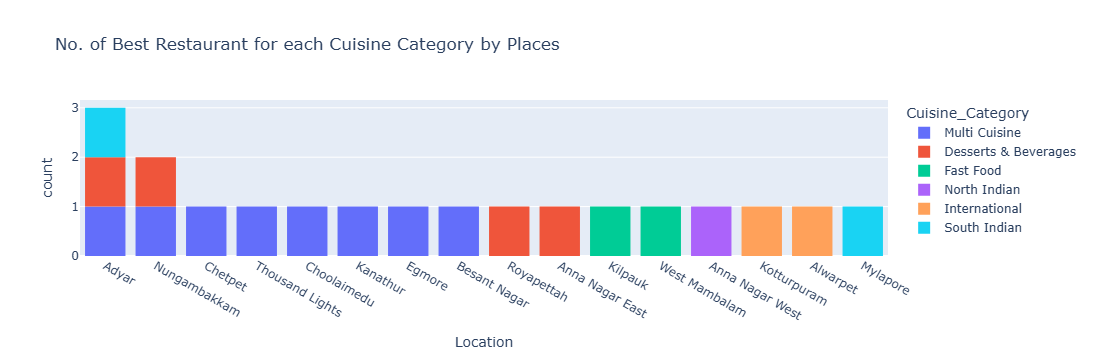

In [39]:
fig = px.histogram(highest_rated_df, x='Location', color='Cuisine_Category',  
             title= 'No. of Best Restaurant for each Cuisine Category by Places').update_xaxes(categoryorder="total descending")
 
fig.show()

Q6) What is the Avg Price Distibution of highest rated restaurant for each Cuisine Type in Chennai?

In [40]:
highest_rated_price_df = highest_rated_df.groupby(by=['Location', 'Cuisine_Category'])['Price for 2'].mean().reset_index() 
highest_rated_price_df.head()

,Location,Cuisine_Category,Price for 2
0,Adyar,Desserts & Beverages,200.0
1,Adyar,Multi Cuisine,1800.0
2,Adyar,South Indian,500.0
3,Alwarpet,International,2000.0
4,Anna Nagar East,Desserts & Beverages,200.0


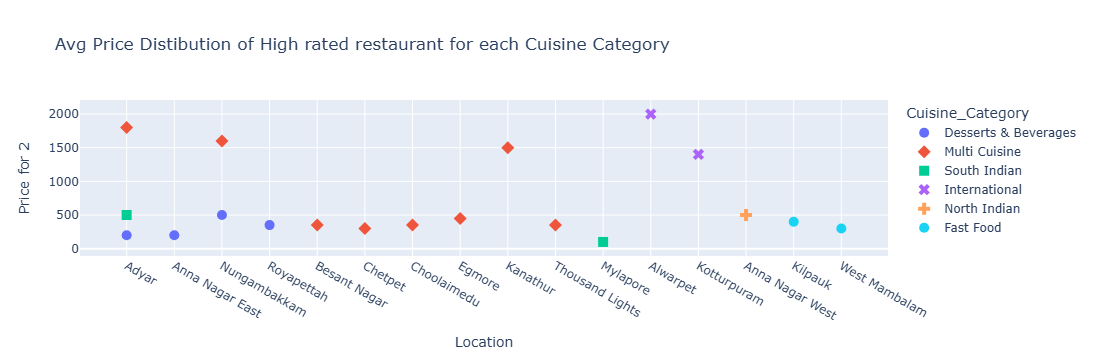

In [41]:
fig = px.scatter(highest_rated_price_df, x="Location", y="Price for 2", color="Cuisine_Category", symbol="Cuisine_Category",  
           title=' Avg Price Distibution of High rated restaurant for each Cuisine Category').update_traces(marker_size=10)
 
fig.show()

Q7) Which areas have a large number of Chinese Restaurant Market?

In [42]:
chinese_df = zomato_df[zomato_df['Cuisine'].str.contains('Chinese')] 
chinese_df 

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Rating,Rating Count,Cuisine_Category
2,SS Hyderabad Biryani,Kodambakkam,"'Biryani', ' North Indian', ' Chinese', ' Ara...","'Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.35,5930,Multi Cuisine
4,Tasty Kitchen,Perambur,"'Chinese', ' Biryani', ' North Indian', ' Che...","'Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.15,11508,Multi Cuisine
5,Dine N Fun,Medavakkam,"'South Indian', ' North Indian', ' Chinese'","'Chicken Grill', ' Shawarma', ' Naan', ' Chic...",450.0,3.95,12633,Multi Cuisine
8,Savoury Sea Shell,Anna Nagar East,"'Arabian', ' Chinese', ' North Indian', ' Leb...","'Shawarma', ' Chicken Grill', ' Brownie', ' S...",1400.0,4.15,12132,Multi Cuisine
9,Sangeetha Veg Restaurant,T. Nagar,"'South Indian', ' North Indian', ' Chinese', ...","'Filtered Coffee', ' Chaat', ' Faluda', ' Mas...",800.0,4.30,20589,Multi Cuisine
...,...,...,...,...,...,...,...,...
12014,Bowl Bazaar,Adyar,"'North Indian', ' South Indian', ' Chinese', ...",NA,500.0,0.00,0,Multi Cuisine
12015,Bowl Bazaar,Medavakkam,"'North Indian', ' South Indian', ' Chinese', ...",NA,500.0,0.00,0,Multi Cuisine
12016,Bowl Bazaar,Perungudi,"'North Indian', ' South Indian', ' Chinese'",NA,400.0,0.00,0,Multi Cuisine
12017,Bowl Bazaar,Medavakkam,"'North Indian', ' South Indian', ' Chinese'",NA,400.0,0.00,0,Multi Cuisine


In [43]:
chinese_rest_df = chinese_df.groupby(by='Location').agg({'Name of Restaurant' : 'count', 'Price for 2' : 'mean'}).rename(columns= {'Name of Restaurant' : 'Count of Restaaurants' }).reset_index()
chinese_rest_df = chinese_rest_df.sort_values('Count of Restaaurants', ascending=False).head(25)
chinese_rest_df.head()

,Location,Count of Restaaurants,Price for 2
144,Porur,131,409.541985
7,Ambattur,115,375.217391
200,Velachery,102,488.235294
139,Perambur,99,413.636364
140,Perungudi,93,445.698925


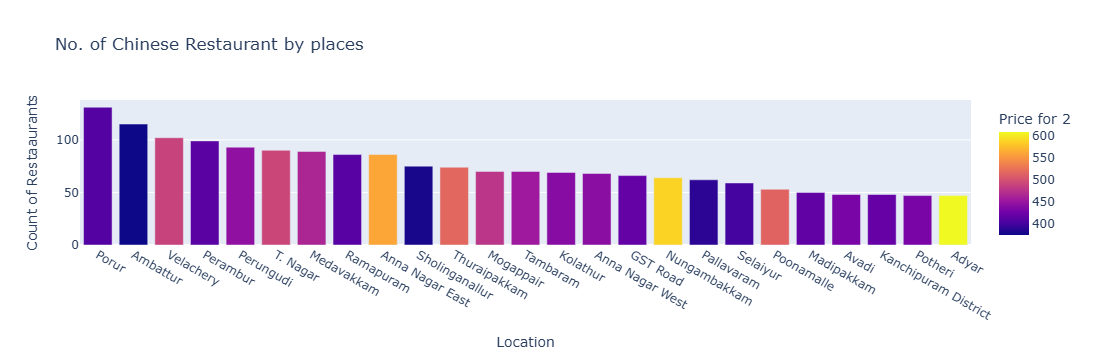

In [44]:
fig = px.bar(chinese_rest_df, x='Location', y='Count of Restaaurants', color='Price for 2', title= 'No. of Chinese Restaurant by places')
 
fig.show()

Q8) Is there a relation between Price and Rating by each Cuisine Type?

In [45]:
price_rating_df = zomato_df.groupby(['Cuisine_Category', 'Rating'])['Price for 2'].mean().reset_index() 
price_rating_df 

,Cuisine_Category,Rating,Price for 2
0,Bar Food,1.10,2100.0
1,Bar Food,1.35,1400.0
2,Bar Food,1.65,1650.0
3,Bar Food,1.75,1750.0
4,Bar Food,1.90,1200.0
...,...,...,...
530,South Indian,4.20,600.0
531,South Indian,4.25,750.0
532,South Indian,4.40,200.0
533,South Indian,4.45,275.0


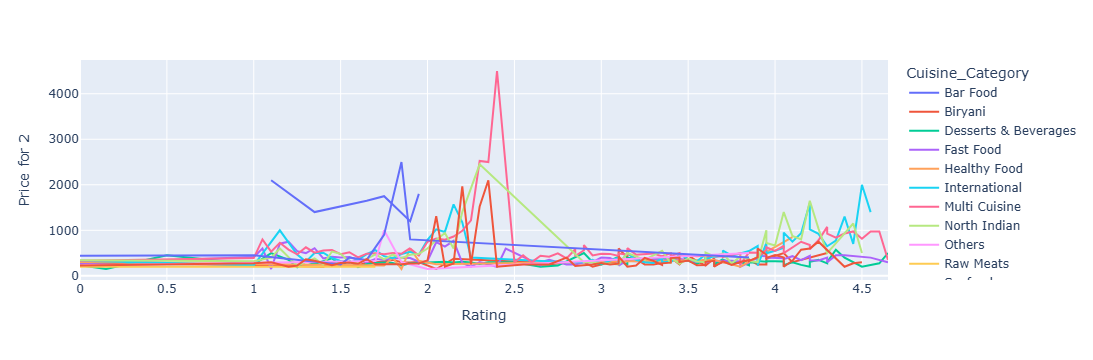

In [46]:
fig = px.line(price_rating_df, y="Price for 2", x="Rating",color='Cuisine_Category')
fig.show() 

In [47]:
price_rating_df['Rating'].corr(price_rating_df['Price for 2'])

np.float64(0.024678221626681936)

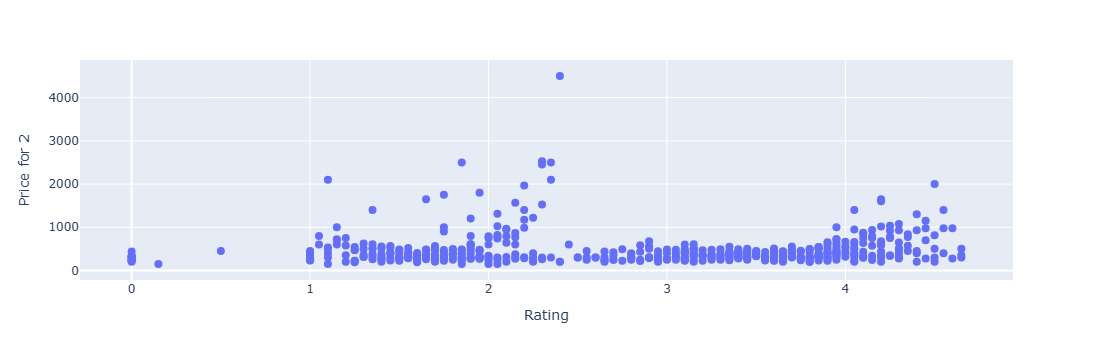

In [48]:
fig = px.scatter(price_rating_df, x="Rating", y="Price for 2").update_traces(marker_size=8) 
fig.show()

Q9) Is there a relation between Location and Price?

In [49]:
region_price_df = zomato_df.groupby(['Location'])['Price for 2'].mean().reset_index() 
region_price_df 

,Location,Price for 2
0,InterContinental Chennai Mahabalipuram Resort...,1500.000000
1,Abhiramapuram,228.571429
2,"Abu Sarovar Portico, Egmore",1000.000000
3,Adambakkam,292.241379
4,Adyar,445.025126
...,...,...
263,"Vivira Mall, Navallur",500.000000
264,Washermenpet,300.438596
265,"WelcomHotel, RK Salai (Cathedral Road)",2075.000000
266,West Mambalam,268.906250


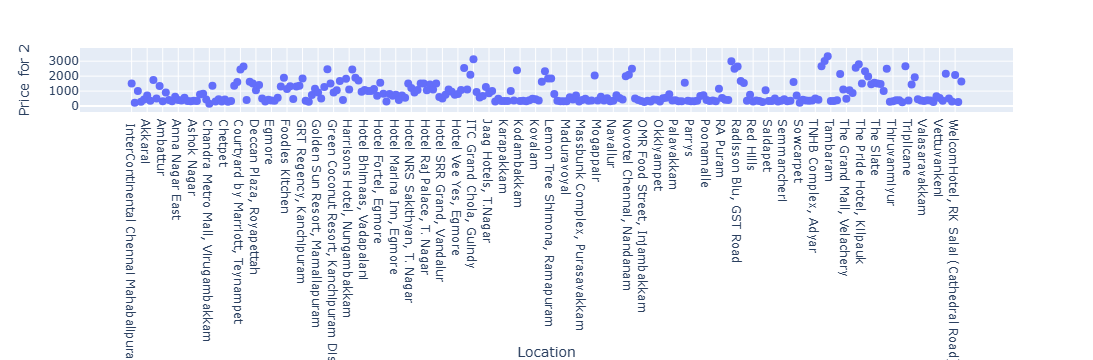

In [50]:
fig = px.scatter(region_price_df, x="Location", y="Price for 2").update_traces(marker_size=8) 
fig.show()

Q10) Find the list of Affordable Restaurants?

The criteria for Affordable Restaurants would be:

1) Low Price 2) High Rated

First step will be to find the restaurants with average cost 1/4th the average cost of most expensive restaurant in our dataframe.
    
Let me explain:-
The most expensive restaurant has an average meal cost= 6000. 
We'll try to stay economical and only pick the restaurants that are 1/4th of 6000.

In [51]:
max_price = zomato_df['Price for 2'].max() 
one_fourth_price = max_price/4 
one_fourth_price 

np.float64(1250.0)

In [52]:
 # Finding list of restaurants that have price less than and equal to 1/4th of the max price i.e Finding Cheap Restauran
 
aff_rest_df = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Cuisine_Category']] 
aff_rest_df = aff_rest_df[aff_rest_df['Price for 2'] <= 1250] 
aff_rest_df.sort_values(by='Price for 2', inplace=True) 
aff_rest_df 

,Name of Restaurant,Price for 2,Cuisine,Location,Cuisine_Category
4685,Soda Hub,40.0,'Beverages',"OMR Food Street, Navallur",Desserts & Beverages
7405,Indian Coffee House,50.0,"'Beverages', ' Juices'",Vepery,Desserts & Beverages
6854,Planet Soda,50.0,"'Beverages', ' Juices'","OMR Food Street, Kandanchavadi",Desserts & Beverages
8355,Kaafemaa,50.0,'Beverages',Ambattur,Desserts & Beverages
1448,Mamee Soup,60.0,'Healthy Food',West Mambalam,Healthy Food
...,...,...,...,...,...
1296,Old Skool Bistro,1200.0,"'Cafe', ' Continental', ' American', ' Mexica...",Nandanam,International
3179,Lava Bar at Metro Grand Hotel,1200.0,'Bar Food',Arumbakkam,Bar Food
93,Kappa Chakka Kandhari,1200.0,"'Kerala', ' South Indian'",Nungambakkam,South Indian
17,Abid's,1200.0,"'Seafood', ' Biryani', ' Hyderabadi', ' Arabi...",Chetpet,Multi Cuisine


In [53]:
 # Finding the highest rated list of restaurants 
 
highrate_rest_df = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Cuisine_Category','Rating']] 
highrate_rest_df = highrate_rest_df[highrate_rest_df['Rating'] >= 4.5] 
highrate_rest_df.sort_values(by='Price for 2', inplace=True) 
highrate_rest_df 

,Name of Restaurant,Price for 2,Cuisine,Location,Cuisine_Category,Rating
108,Rayar's Mess,100.0,'South Indian',Mylapore,South Indian,4.50
320,Bombay Kulfi,200.0,'Ice Cream',Adyar,Desserts & Beverages,4.60
9541,Bombay Kulfi,200.0,'Ice Cream',Anna Nagar East,Desserts & Beverages,4.50
37,Shree Mithai,300.0,"'Mithai', ' Street Food', ' Fast Food'",Chetpet,Multi Cuisine,4.50
155,The Sandwich Shop,300.0,"'Sandwich', ' Fast Food', ' Beverages'",West Mambalam,Fast Food,4.65
57,Brownie Heaven,350.0,"'Bakery', ' Desserts', ' Beverages'",Royapettah,Desserts & Beverages,4.60
163,Momo Sa-Khang by Kailash Kitchen,350.0,"'Momos', ' Chinese'",Choolaimedu,Multi Cuisine,4.65
92,Fruit Shop On Greams Road,350.0,"'Beverages', ' Fast Food', ' Healthy Food', '...",Thousand Lights,Multi Cuisine,4.55
9160,Fruit Shop On Greams Road,350.0,"'Beverages', ' Fast Food', ' Healthy Food', '...",Besant Nagar,Multi Cuisine,4.50
75,Fusilli Reasons,400.0,'Fast Food',Kilpauk,Fast Food,4.55


Now, we'll merge the aff_rest_df with highrate_rest_df to obtain the intersection i.e the list of Affordable Restaurants !!

In [54]:
highrate_aff_df = pd.merge(aff_rest_df, highrate_rest_df, how='inner', on=['Name of Restaurant', 'Location']) 
highrate_aff_df = highrate_aff_df[['Name of Restaurant', 'Price for 2_x', 'Cuisine_x', 'Location', 'Cuisine_Category_x','Rating']] 
highrate_aff_df.rename(columns={'Name of Restaurant':'Name of Restaurant', 'Price for 2_x':'Price for 2', 'Cuisine_x':'Cuisine',  
                                'Location':'Location', 'Cuisine_Category_x':'Cuisine_Category', 'Rating':'Rating'},inplace=True)

In [55]:
 # Affordable Restaurants with low price and high rating  
 
highrate_aff_df

,Name of Restaurant,Price for 2,Cuisine,Location,Cuisine_Category,Rating
0,Rayar's Mess,100.0,'South Indian',Mylapore,South Indian,4.50
1,Bombay Kulfi,200.0,'Ice Cream',Anna Nagar East,Desserts & Beverages,4.50
2,Bombay Kulfi,200.0,'Ice Cream',Adyar,Desserts & Beverages,4.60
3,The Sandwich Shop,300.0,"'Sandwich', ' Fast Food', ' Beverages'",West Mambalam,Fast Food,4.65
4,Shree Mithai,300.0,"'Mithai', ' Street Food', ' Fast Food'",Chetpet,Multi Cuisine,4.50
5,Brownie Heaven,350.0,"'Bakery', ' Desserts', ' Beverages'",Royapettah,Desserts & Beverages,4.60
6,Fruit Shop On Greams Road,350.0,"'Beverages', ' Fast Food', ' Healthy Food', '...",Thousand Lights,Multi Cuisine,4.55
7,Fruit Shop On Greams Road,350.0,"'Beverages', ' Fast Food', ' Healthy Food', '...",Besant Nagar,Multi Cuisine,4.50
8,Momo Sa-Khang by Kailash Kitchen,350.0,"'Momos', ' Chinese'",Choolaimedu,Multi Cuisine,4.65
9,Fusilli Reasons,400.0,'Fast Food',Kilpauk,Fast Food,4.55


Q11) Find the list of most Reliable Restaurants?
The criteria for most Reliable Restaurants would be:
1) Low Price 2) High Rated 3) Large No. of Votes
First step will be to find the restaurants with Votes greater than Mean of Votes

In [56]:
mean_counts = zomato_df['Rating Count'].mean() 
mean_counts 

np.float64(396.8900234348845)

In [57]:
# Finding list of restaurants that have Votes greater than and equal to  Mean of Vote 
 
mean_rest_df = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Cuisine_Category','Rating Count']] 
mean_rest_df = mean_rest_df[mean_rest_df['Rating Count'] > 397] 
mean_rest_df.sort_values(by='Rating Count', inplace=True) 
mean_rest_df

,Name of Restaurant,Price for 2,Cuisine,Location,Cuisine_Category,Rating Count
2238,The Juice Shop,250.0,"'Beverages', ' Juices', ' Fast Food'",Pallavaram,Multi Cuisine,398
199,Arabian Kebab Center,400.0,"'Biryani', ' North Indian', ' Kebab'",Kodambakkam,North Indian,399
3583,Hyderabad Briyani,800.0,"'Biryani', ' Chinese', ' South Indian'",Tambaram,Multi Cuisine,399
1732,Shiva Bhavan,300.0,'North Indian',Triplicane,North Indian,399
10166,Ovenstory Pizza,400.0,"'Italian', ' Pizza'",Ambattur,Multi Cuisine,400
...,...,...,...,...,...,...
8822,Sangeetha Veg Restaurant,500.0,"'South Indian', ' North Indian', ' Chinese'",Thuraipakkam,Multi Cuisine,23532
232,Sapthagiri Tiffin Centre,150.0,"'South Indian', ' Chinese'",T. Nagar,Multi Cuisine,24267
22,Supriya Andhra Restaurant,650.0,"'Biryani', ' North Indian', ' Chinese'",Thuraipakkam,Multi Cuisine,26046
251,Hotelkaar Biriyani,350.0,"'South Indian', ' Biryani'",T. Nagar,South Indian,26389


These are the most reliable, highest rated and affordable restaurants:

We obtain this dataframe by simply taking the intersection of highrate_aff_df & mean_rest_df

This dataframe obtained below shows the restaurants whose:
    
Cost is below 1250

Rating is above 4.5

Votes are above 397

In [58]:
reliable_rest_df = pd.merge(mean_rest_df, highrate_aff_df, how='inner', on=['Name of Restaurant', 'Location']) 
reliable_rest_df = reliable_rest_df[['Name of Restaurant', 'Price for 2_x', 'Cuisine_x', 'Location', 'Cuisine_Category_x','Rating','Rating Count']] 
reliable_rest_df.rename(columns={'Name of Restaurant':'Name of Restaurant', 'Price for 2_x':'Price for 2', 'Cuisine_x':'Cuisine',  
                                'Location':'Location', 'Cuisine_Category_x':'Cuisine_Category', 'Rating':'Rating','Rating Count':'Rating Count'},inplace=True)
reliable_rest_df

,Name of Restaurant,Price for 2,Cuisine,Location,Cuisine_Category,Rating,Rating Count
0,The Sandwich Shop,300.0,"'Sandwich', ' Fast Food', ' Beverages'",West Mambalam,Fast Food,4.65,739
1,Amadora Gourmet Ice Cream & Sorbet,500.0,"'Desserts', ' Ice Cream'",Nungambakkam,Desserts & Beverages,4.65,938
2,Fruit Shop On Greams Road,350.0,"'Beverages', ' Fast Food', ' Healthy Food', '...",Besant Nagar,Multi Cuisine,4.50,976
3,Bombay Kulfi,200.0,'Ice Cream',Adyar,Desserts & Beverages,4.60,1005
4,Rayar's Mess,100.0,'South Indian',Mylapore,South Indian,4.50,1111
5,Fruit Shop On Greams Road,350.0,"'Beverages', ' Fast Food', ' Healthy Food', '...",Thousand Lights,Multi Cuisine,4.55,1154
6,Brownie Heaven,350.0,"'Bakery', ' Desserts', ' Beverages'",Royapettah,Desserts & Beverages,4.60,1556
7,Kabab Corner,450.0,"'Kebab', ' Rolls', ' Mughlai'",Egmore,Multi Cuisine,4.60,1566
8,Bombay Kulfi,200.0,'Ice Cream',Anna Nagar East,Desserts & Beverages,4.50,1932
9,Momo Sa-Khang by Kailash Kitchen,350.0,"'Momos', ' Chinese'",Choolaimedu,Multi Cuisine,4.65,2241
